# PARTE 2 - TRABALHO 

### Importação Bibliotecas

In [2]:
import pandas as pd
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

### Lendo dataset limpo e dataset de renda por bairros

In [3]:

df = pd.read_csv('../PÓS/2024-04-01_sigesguarda_-_Base_de_Dados_limpo.csv', low_memory=False)
df_renda = pd.read_csv('../PÓS/renda_populacao_bairros.csv')
df_renda

,Bairros,código,Média de Media latitude,Média de media longitude,Tempo,RMR,Resíduo padrão,Label,Área (km²),Homens,Mulheres,População Total,Domicilios particulares,Rendimento mensal médio por responsáveis dos domicílios (R$)
0,ALTO BOQUEIRAO,47,"-25,5333703446815","-49,2421297196611",19,"2,9","-2,44201144966097",Alto Boqueirão,"12,11",24824,26331,51155,14301,"1110,63"
1,LAMENHA PEQUENA,63,"-25,3663199254971","-49,329475340023",12,"2,4","-1,94536383937777",Lamenha Pequena,"3,4",353,348,701,188,"665,99"
2,XAXIM,23,"-25,5090296034033","-49,267007631085",13,"3,6","-1,46226860276454",Xaxim,"8,92",26747,27944,54691,15482,"1211,6"
3,RIVIERA,44,"-25,432985833447","-49,3752248454806",5,2,"-1,40451417150524",Riviera,"2,36",100,103,203,62,"423,13"
4,SAO MIGUEL,56,"-25,4239432472046","-49,2753387501628",3,"1,8","-1,26964591891819",São Miguel,7,2512,2399,4911,1247,"409,43"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,AGUA VERDE,20,"-25,4562685970111","-49,2824852438511",5,"8,6","1,48085275174357",Água Verde,"4,76",22546,27320,49866,17045,"3332,57"
71,ALTO DA GLORIA,17,"-25,4197837553954","-49,2619576094335",5,"8,8","1,51261666611751",Alto da Glória,"0,88",2513,3075,5588,2125,"3263,47"
72,BIGORRILHO,66,"-25,432202410157","-49,2970504546452",7,"9,7","1,7477577908611",Bigorrilho,"3,5",12359,14768,27127,9937,"3792,68"
73,MOSSUNGUE,35,"-25,4376059994547","-49,3284034303193",6,"9,4","1,76968272357425",Mossunguê,"3,38",2751,2877,5628,1586,"2965,09"


### Manipulação dos dataset 

#### Selecionando colunas de interesse em novo dataset

In [4]:
df_renda = df_renda.loc[:, ['Bairros', 'Rendimento mensal médio por responsáveis dos domicílios (R$)']]
df_renda

,Bairros,Rendimento mensal médio por responsáveis dos domicílios (R$)
0,ALTO BOQUEIRAO,"1110,63"
1,LAMENHA PEQUENA,"665,99"
2,XAXIM,"1211,6"
3,RIVIERA,"423,13"
4,SAO MIGUEL,"409,43"
...,...,...
70,AGUA VERDE,"3332,57"
71,ALTO DA GLORIA,"3263,47"
72,BIGORRILHO,"3792,68"
73,MOSSUNGUE,"2965,09"


#### Adaptação de nome das colunas

In [41]:
df_renda = df_renda.rename(columns={
    'Bairros': 'ATENDIMENTO_BAIRRO_NOME',
    'Rendimento mensal médio por responsáveis dos domicílios (R$)': 'RENDA'
})


##### Ajuste das variáveis para união dos dataframes

In [6]:
df_renda['ATENDIMENTO_BAIRRO_NOME'] = df_renda['ATENDIMENTO_BAIRRO_NOME'].replace('CIDADE INDUSTRIAL DE CURITIBA', 'CIDADE INDUSTRIAL')
df_renda['ATENDIMENTO_BAIRRO_NOME'] = df_renda['ATENDIMENTO_BAIRRO_NOME'].apply(lambda x: unidecode(x).upper())
df['ATENDIMENTO_BAIRRO_NOME'] = df['ATENDIMENTO_BAIRRO_NOME'].apply(lambda x: unidecode(x).upper())


In [7]:
df_renda

,ATENDIMENTO_BAIRRO_NOME,RENDA
0,ALTO BOQUEIRAO,"1110,63"
1,LAMENHA PEQUENA,"665,99"
2,XAXIM,"1211,6"
3,RIVIERA,"423,13"
4,SAO MIGUEL,"409,43"
...,...,...
70,AGUA VERDE,"3332,57"
71,ALTO DA GLORIA,"3263,47"
72,BIGORRILHO,"3792,68"
73,MOSSUNGUE,"2965,09"


#### Salvando novo dataframe

In [8]:
df_renda.to_csv('../PÓS/df_renda.csv')


In [3]:
df_renda = pd.read_csv('../PÓS/df_renda.csv')
df_renda


,Unnamed: 0,ATENDIMENTO_BAIRRO_NOME,RENDA
0,0,ALTO BOQUEIRAO,"1110,63"
1,1,LAMENHA PEQUENA,"665,99"
2,2,XAXIM,"1211,6"
3,3,RIVIERA,"423,13"
4,4,SAO MIGUEL,"409,43"
...,...,...,...
70,70,AGUA VERDE,"3332,57"
71,71,ALTO DA GLORIA,"3263,47"
72,72,BIGORRILHO,"3792,68"
73,73,MOSSUNGUE,"2965,09"


### Criando dataframe único

In [10]:
df_final = pd.merge(df, df_renda, on='ATENDIMENTO_BAIRRO_NOME', how='left')
df_final = df_final.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314430 entries, 0 to 314571
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ATENDIMENTO_ANO           314430 non-null  int64  
 1   ATENDIMENTO_BAIRRO_NOME   314430 non-null  object 
 2   FLAG_FLAGRANTE            314430 non-null  object 
 3   LOGRADOURO_NOME           314430 non-null  object 
 4   NATUREZA1_DESCRICAO       314430 non-null  object 
 5   OCORRENCIA_HORA           314430 non-null  object 
 6   OCORRENCIA_MES            314430 non-null  int64  
 7   ORIGEM_CHAMADO_DESCRICAO  314430 non-null  object 
 8   REGIONAL_FATO_NOME        314430 non-null  object 
 9   SECRETARIA_NOME           314430 non-null  object 
 10  SECRETARIA_SIGLA          314430 non-null  object 
 11  SERVICO_NOME              314430 non-null  object 
 12  Unnamed: 0                314430 non-null  float64
 13  RENDA                     314430 non-null  object

##### Salvando dataset

In [11]:
df_final.to_csv('../PÓS/df_com_renda.csv', index = False)

In [40]:
df = pd.read_csv('../PÓS/df_com_renda.csv')
df

,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DESCRICAO,OCORRENCIA_HORA,OCORRENCIA_MES,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,Unnamed: 0,RENDA
0,2009,CIDADE INDUSTRIAL,NÃO,DAVI XAVIER DA SILVA,Alarmes,1900-01-01 15:14:00,1,.,CIC,FUNDAÇÃO DE AÇÃO SOCIAL,FAS,SIGA,14.0,"639,09"
1,2009,FAZENDINHA,NÃO,CARLOS KLEMTZ,Roubo,1900-01-01 15:22:00,1,153,PORTÃO,SECRETARIA MUNICIPAL MEIO AMBIENTE,SMMA,NORMAL,19.0,"833,84"
2,2009,UBERABA,NÃO,DOUTOR JOÃO DE PAULA MOURA BRITO,Animais,1900-01-01 15:59:00,1,156,CAJURU,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,21.0,"952,14"
3,2009,SITIO CERCADO,NÃO,EDGARD CAVALCANTI DE ALBUQUERQUE,Animais,1900-01-01 16:13:00,1,156,BAIRRO NOVO,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,13.0,"934,95"
4,2009,TATUQUARA,NÃO,CARLOS MUNHOZ DA ROCHA,Alarmes,1900-01-01 16:29:00,1,.,PINHEIRINHO,FUNDAÇÃO DE AÇÃO SOCIAL,FAS,SIGA,7.0,"462,26"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314425,2022,PORTAO,NÃO,REPÚBLICA ARGENTINA,Ameaça,1900-01-01 06:09:00,12,153,PORTÃO,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,47.0,"1722,89"
314426,2022,SITIO CERCADO,NÃO,RICARDO GASPARIAN MACHADO,Roubo,1900-01-01 06:26:00,12,153,BAIRRO NOVO,URBANIZAÇÃO DE CURITIBA,URBS,NORMAL,13.0,"934,95"
314427,2022,JARDIM BOTANICO,NÃO,SETE DE SETEMBRO,Apoio,1900-01-01 06:28:00,12,153,MATRIZ,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,46.0,"1885,75"
314428,2022,JARDIM BOTANICO,NÃO,SETE DE SETEMBRO,Avaria em Equipamento/Patrimônio (não intencio...,1900-01-01 06:35:00,12,IMEDIATA,MATRIZ,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,GPEO,46.0,"1885,75"


### Criando coluna Frequência (por tipo de ocorrência)

In [13]:
df['FREQUENCIA'] = df.groupby(['ATENDIMENTO_BAIRRO_NOME', 'NATUREZA1_DESCRICAO'])['NATUREZA1_DESCRICAO'].transform('count')


### Criando dataframe de frequências

#### Tabela Pivot 

In [15]:
# Pivot table
df_ocorr = df.pivot_table(index='ATENDIMENTO_BAIRRO_NOME', columns='NATUREZA1_DESCRICAO', values='FREQUENCIA', aggfunc='sum')
df_ocorr.fillna(0, inplace=True)
df_ocorr.drop_duplicates(inplace=True)
df_ocorr


NATUREZA1_DESCRICAO,AIFU,Abandono de função,Abandono de incapaz,Abuso de incapazes,Achado,Acidente Viatura,Afogamento,Afundamento de Piso,Agressão física/verbal,Alagamento,...,Veículo,Vias de fato,Vilipêndio a cadáver,Violação de Medida Protetiva Lei Maria da Penha,Violação de sepultura/túmulo,Violência arbitrária,Vistoria,ZELADORIA URBANA,Óbito,Órgãos acionados
ATENDIMENTO_BAIRRO_NOME,,,,,,,,,,,,,,,,,,,,,
ABRANCHES,9.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1225.0,225.0,...,144.0,36.0,0.0,3025.0,0.0,0.0,324.0,1.0,0.0,0.0
AGUA VERDE,576.0,1.0,9.0,0.0,144.0,4.0,0.0,0.0,3844.0,676.0,...,2025.0,2401.0,0.0,576.0,1.0,0.0,1369.0,1225.0,1.0,0.0
AHU,16.0,0.0,4.0,0.0,16.0,0.0,0.0,0.0,4.0,16.0,...,9.0,4.0,0.0,100.0,0.0,0.0,25.0,0.0,0.0,0.0
ALTO BOQUEIRAO,361.0,1.0,25.0,1.0,676.0,0.0,0.0,0.0,11881.0,3844.0,...,9025.0,1089.0,0.0,5929.0,1.0,0.0,4624.0,196.0,16.0,0.0
ALTO DA GLORIA,81.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,841.0,16.0,...,64.0,484.0,0.0,16.0,0.0,0.0,36.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBERABA,100.0,0.0,1.0,4.0,81.0,4.0,0.0,0.0,15129.0,15376.0,...,3721.0,441.0,0.0,17956.0,0.0,0.0,7744.0,1089.0,9.0,1.0
UMBARA,64.0,0.0,1.0,0.0,16.0,0.0,0.0,0.0,676.0,144.0,...,841.0,4.0,0.0,2116.0,0.0,0.0,144.0,81.0,4.0,0.0
VILA IZABEL,25.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,144.0,1.0,...,100.0,49.0,0.0,576.0,0.0,0.0,36.0,25.0,0.0,1.0


#### Salvando novo dataset

In [16]:
df_ocorr.to_csv('../PÓS/df_ocorrencia.csv', index = True)

In [26]:
df_ocorr = pd.read_csv('../PÓS/df_ocorrencia.csv')
df_ocorr

,ATENDIMENTO_BAIRRO_NOME,AIFU,Abandono de função,Abandono de incapaz,Abuso de incapazes,Achado,Acidente Viatura,Afogamento,Afundamento de Piso,Agressão física/verbal,...,Veículo,Vias de fato,Vilipêndio a cadáver,Violação de Medida Protetiva Lei Maria da Penha,Violação de sepultura/túmulo,Violência arbitrária,Vistoria,ZELADORIA URBANA,Óbito,Órgãos acionados
0,ABRANCHES,9.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1225.0,...,144.0,36.0,0.0,3025.0,0.0,0.0,324.0,1.0,0.0,0.0
1,AGUA VERDE,576.0,1.0,9.0,0.0,144.0,4.0,0.0,0.0,3844.0,...,2025.0,2401.0,0.0,576.0,1.0,0.0,1369.0,1225.0,1.0,0.0
2,AHU,16.0,0.0,4.0,0.0,16.0,0.0,0.0,0.0,4.0,...,9.0,4.0,0.0,100.0,0.0,0.0,25.0,0.0,0.0,0.0
3,ALTO BOQUEIRAO,361.0,1.0,25.0,1.0,676.0,0.0,0.0,0.0,11881.0,...,9025.0,1089.0,0.0,5929.0,1.0,0.0,4624.0,196.0,16.0,0.0
4,ALTO DA GLORIA,81.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,841.0,...,64.0,484.0,0.0,16.0,0.0,0.0,36.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,UBERABA,100.0,0.0,1.0,4.0,81.0,4.0,0.0,0.0,15129.0,...,3721.0,441.0,0.0,17956.0,0.0,0.0,7744.0,1089.0,9.0,1.0
71,UMBARA,64.0,0.0,1.0,0.0,16.0,0.0,0.0,0.0,676.0,...,841.0,4.0,0.0,2116.0,0.0,0.0,144.0,81.0,4.0,0.0
72,VILA IZABEL,25.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,144.0,...,100.0,49.0,0.0,576.0,0.0,0.0,36.0,25.0,0.0,1.0
73,VISTA ALEGRE,1.0,0.0,1.0,0.0,36.0,0.0,0.0,0.0,100.0,...,64.0,4.0,0.0,225.0,0.0,0.0,256.0,4.0,1.0,0.0


### Modelagem - Cluester

##### Adequação de colunas

In [6]:
# Substituir vírgulas por pontos na coluna 'RENDA'
df_renda['RENDA'] = df_renda['RENDA'].str.replace(',', '.')
# Converter a coluna 'RENDA' para float
df_renda['RENDA'] = df_renda['RENDA'].astype(float)



In [39]:
df_renda = df_renda.sort_values(by='RENDA', ascending=False)


#### Utilizando KMeans para criação de cluster por renda


In [27]:
X = df_renda[['RENDA']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
df_renda['Cluster'] = kmeans.labels_
print(df_renda[['ATENDIMENTO_BAIRRO_NOME', 'RENDA', 'Cluster']])

   ATENDIMENTO_BAIRRO_NOME    RENDA  Cluster
74                   BATEL  5120.73        2
66           JARDIM SOCIAL  4606.60        2
65                  CABRAL  3914.15        5
72              BIGORRILHO  3792.68        5
68                  JUVEVE  3435.48        5
..                     ...      ...      ...
5         CAMPO DE SANTANA   564.95        4
8                  CAXIMBA   525.34        4
7                TATUQUARA   462.26        4
3                  RIVIERA   423.13        4
4               SAO MIGUEL   409.43        4

[75 rows x 3 columns]


#### Criando cluster por frequência de ocorrência

In [28]:
X = df_ocorr.drop('ATENDIMENTO_BAIRRO_NOME', axis=1)
scaler = StandardScaler()
n_clusters = 7
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agglomerative.fit_predict(X_scaled)
df_ocorr['Cluster'] = clusters
df_ocorr[['ATENDIMENTO_BAIRRO_NOME', 'Cluster']]


,ATENDIMENTO_BAIRRO_NOME,Cluster
0,ABRANCHES,3
1,AGUA VERDE,3
2,AHU,6
3,ALTO BOQUEIRAO,6
4,ALTO DA GLORIA,1
...,...,...
70,UBERABA,4
71,UMBARA,4
72,VILA IZABEL,4
73,VISTA ALEGRE,4


## Plotagem 

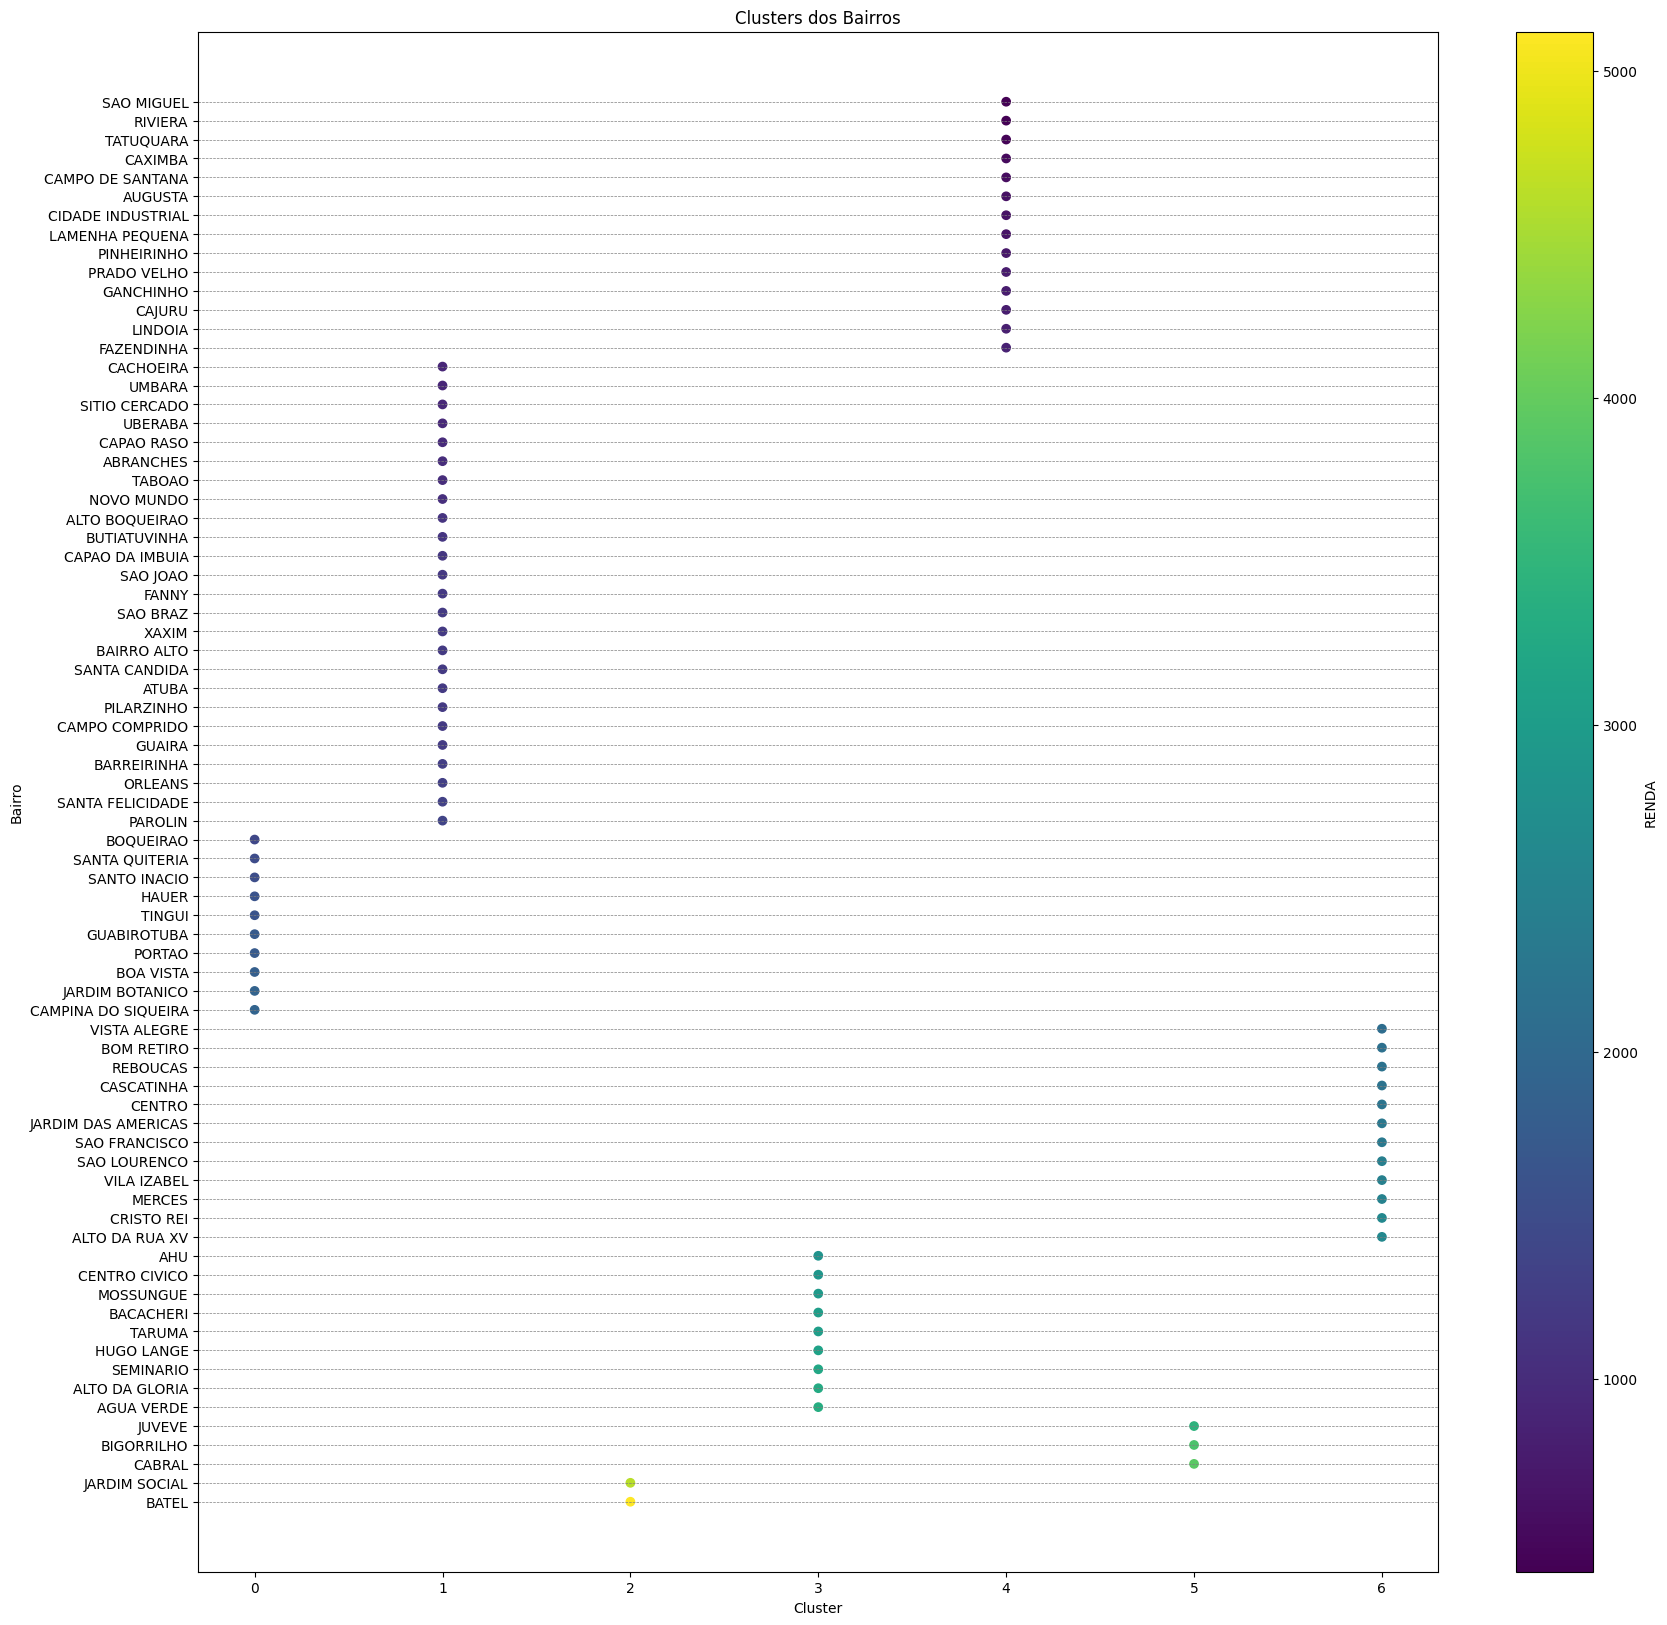

In [13]:
plt.figure(figsize=(20, 20))
plt.scatter(df_renda['Cluster'], df_renda['ATENDIMENTO_BAIRRO_NOME'], c=df_renda['RENDA'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Bairro')
plt.title('Clusters dos Bairros')
plt.colorbar(label='RENDA')
bairros_unicos = df_renda['ATENDIMENTO_BAIRRO_NOME'].unique()
for bairro in bairros_unicos:
    plt.axhline(y=bairro, color='gray', linestyle='--', linewidth=0.5)
plt.show()

### Por Frequência de Ocorrência

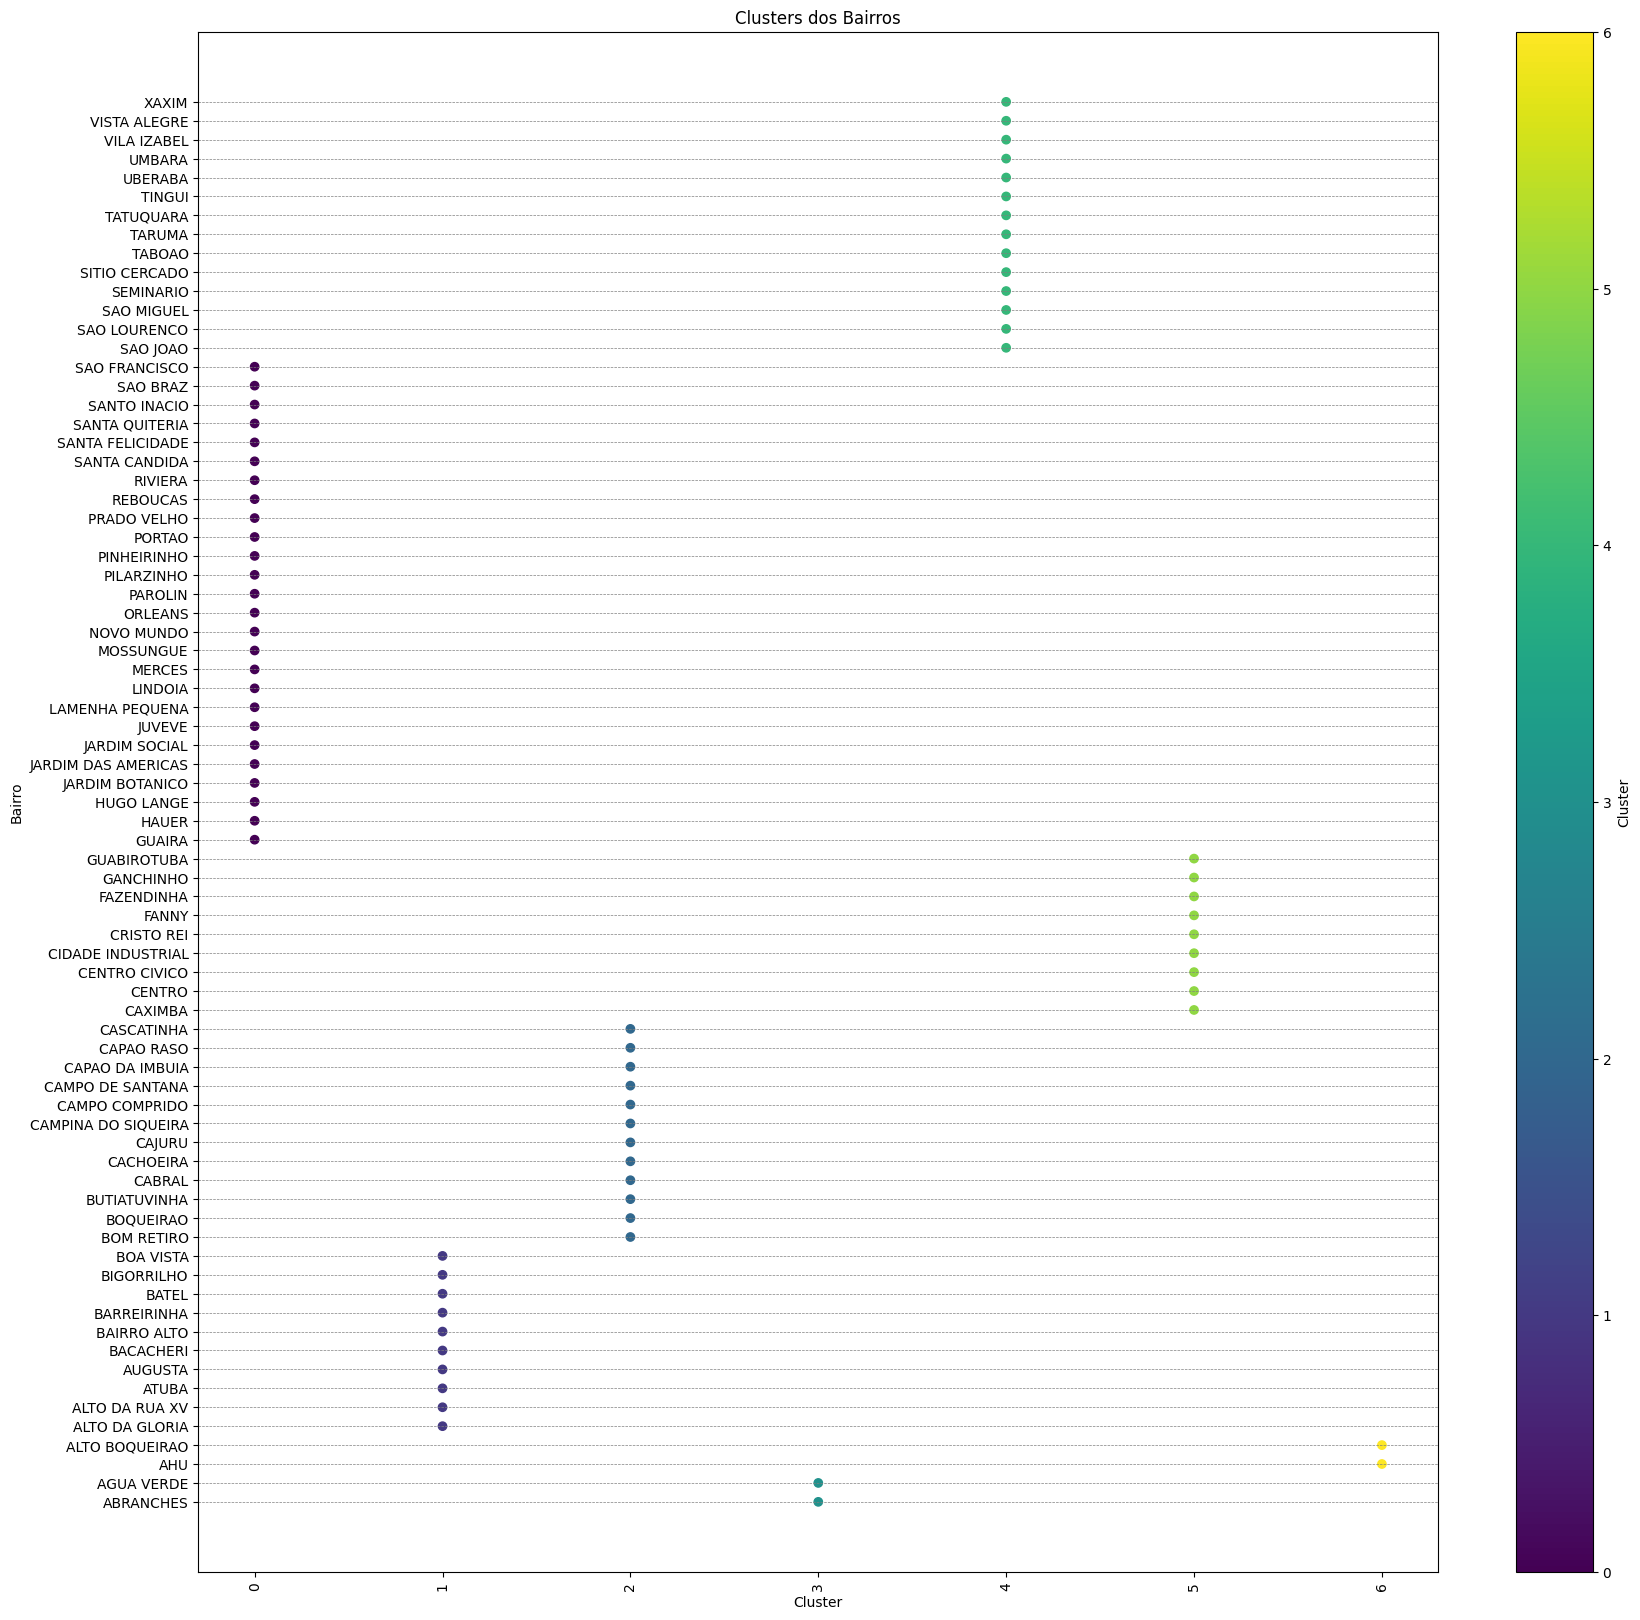

In [29]:
plt.figure(figsize=(20, 20))
plt.scatter(df_ocorr['Cluster'], df_ocorr['ATENDIMENTO_BAIRRO_NOME'], c=df_ocorr['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Bairro')
plt.title('Clusters dos Bairros')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.colorbar(label='Cluster')
bairros_unicos = df_renda['ATENDIMENTO_BAIRRO_NOME'].unique()
for bairro in bairros_unicos:
    plt.axhline(y=bairro, color='gray', linestyle='--', linewidth=0.5)

plt.show()


## Análise de Correlação

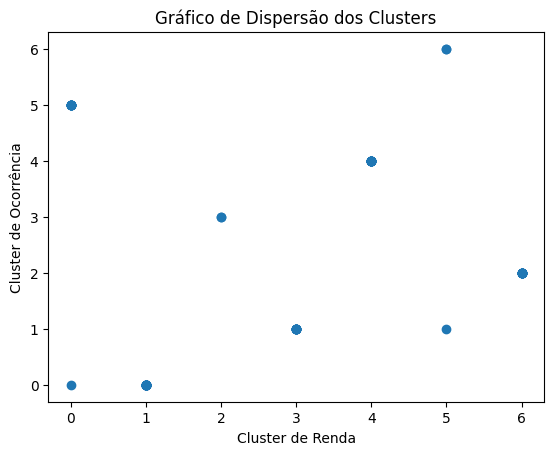

In [30]:

plt.scatter(df_renda['Cluster'], df_ocorr['Cluster'])
plt.xlabel('Cluster de Renda')
plt.ylabel('Cluster de Ocorrência')
plt.title('Gráfico de Dispersão dos Clusters')
plt.show()

In [31]:
correlation = df_renda['Cluster'].corr(df_ocorr['Cluster'])
print("Correlação entre os clusters de renda e ocorrência:", correlation)

Correlação entre os clusters de renda e ocorrência: -0.03979969114234654
